### 1. Install and Import Dependencies

First we install pytorch from https://pytorch.org/  <br>
Then we clone and install req for yolov5 from the readme file of https://github.com/ultralytics/yolov5

In [1]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
                                              0.0/2.5 MB ? eta -:--:--
     ------------                             0.8/2.5 MB 48.6 MB/s eta 0:00:01
     --------------------------------         2.0/2.5 MB 25.9 MB/s eta 0:00:01
     ---------------------------------------  2.5/2.5 MB 26.0 MB/s eta 0:00:01
     ---------------------------------------- 2.5/2.5 MB 19.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
                                              0.0/2.5 MB ? eta -:--:--
     --------------------                     1.3/2.5 MB 27.2 MB/s eta 0:00:01
     ---------------------------------------  2.4/2.5 MB 25.8 MB/s eta 0:00:01
     ---------------------------------------- 2.5/2.5 MB 22.3 MB/s eta 0:00:00
                                              0.0/2.5 MB ? eta -:--:--
     ----------             

In [4]:
# !git clone https://github.com/ultralytics/yolov5                

Cloning into 'yolov5'...


In [9]:
# !cd yolov5 & pip install -r requirements.txt

                                              0.0/612.6 kB ? eta -:--:--
     -----------------                      276.5/612.6 kB 5.7 MB/s eta 0:00:01
     -------------------------------------  604.2/612.6 kB 7.6 MB/s eta 0:00:01
     -------------------------------------- 612.6/612.6 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20


In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

### 2. Load Model

Load model from pytorch hub ie. https://pytorch.org/hub/ in that https://pytorch.org/hub/ultralytics_yolov5/  <br>
The code written below is taken from the above website

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ngunj/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...

requirements: 1 package updated per C:\Users\ngunj\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2023-6-28 Python-3.10.0 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### 3. Make Detections

yolo is trained on the coco dataset which has around 80k classes.

In [24]:
img = 'https://img.freepik.com/free-photo/cars-city-traffic-daylight_23-2149092084.jpg?w=2000'

In [27]:
results = model(img)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1330x2000 7 persons, 10 cars, 6 trucks
Speed: 137.1ms pre-process, 119.2ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)

In [34]:
# %matplotlib inline
# plt.imshow(np.squeeze(results.render())) 
# plt.show()

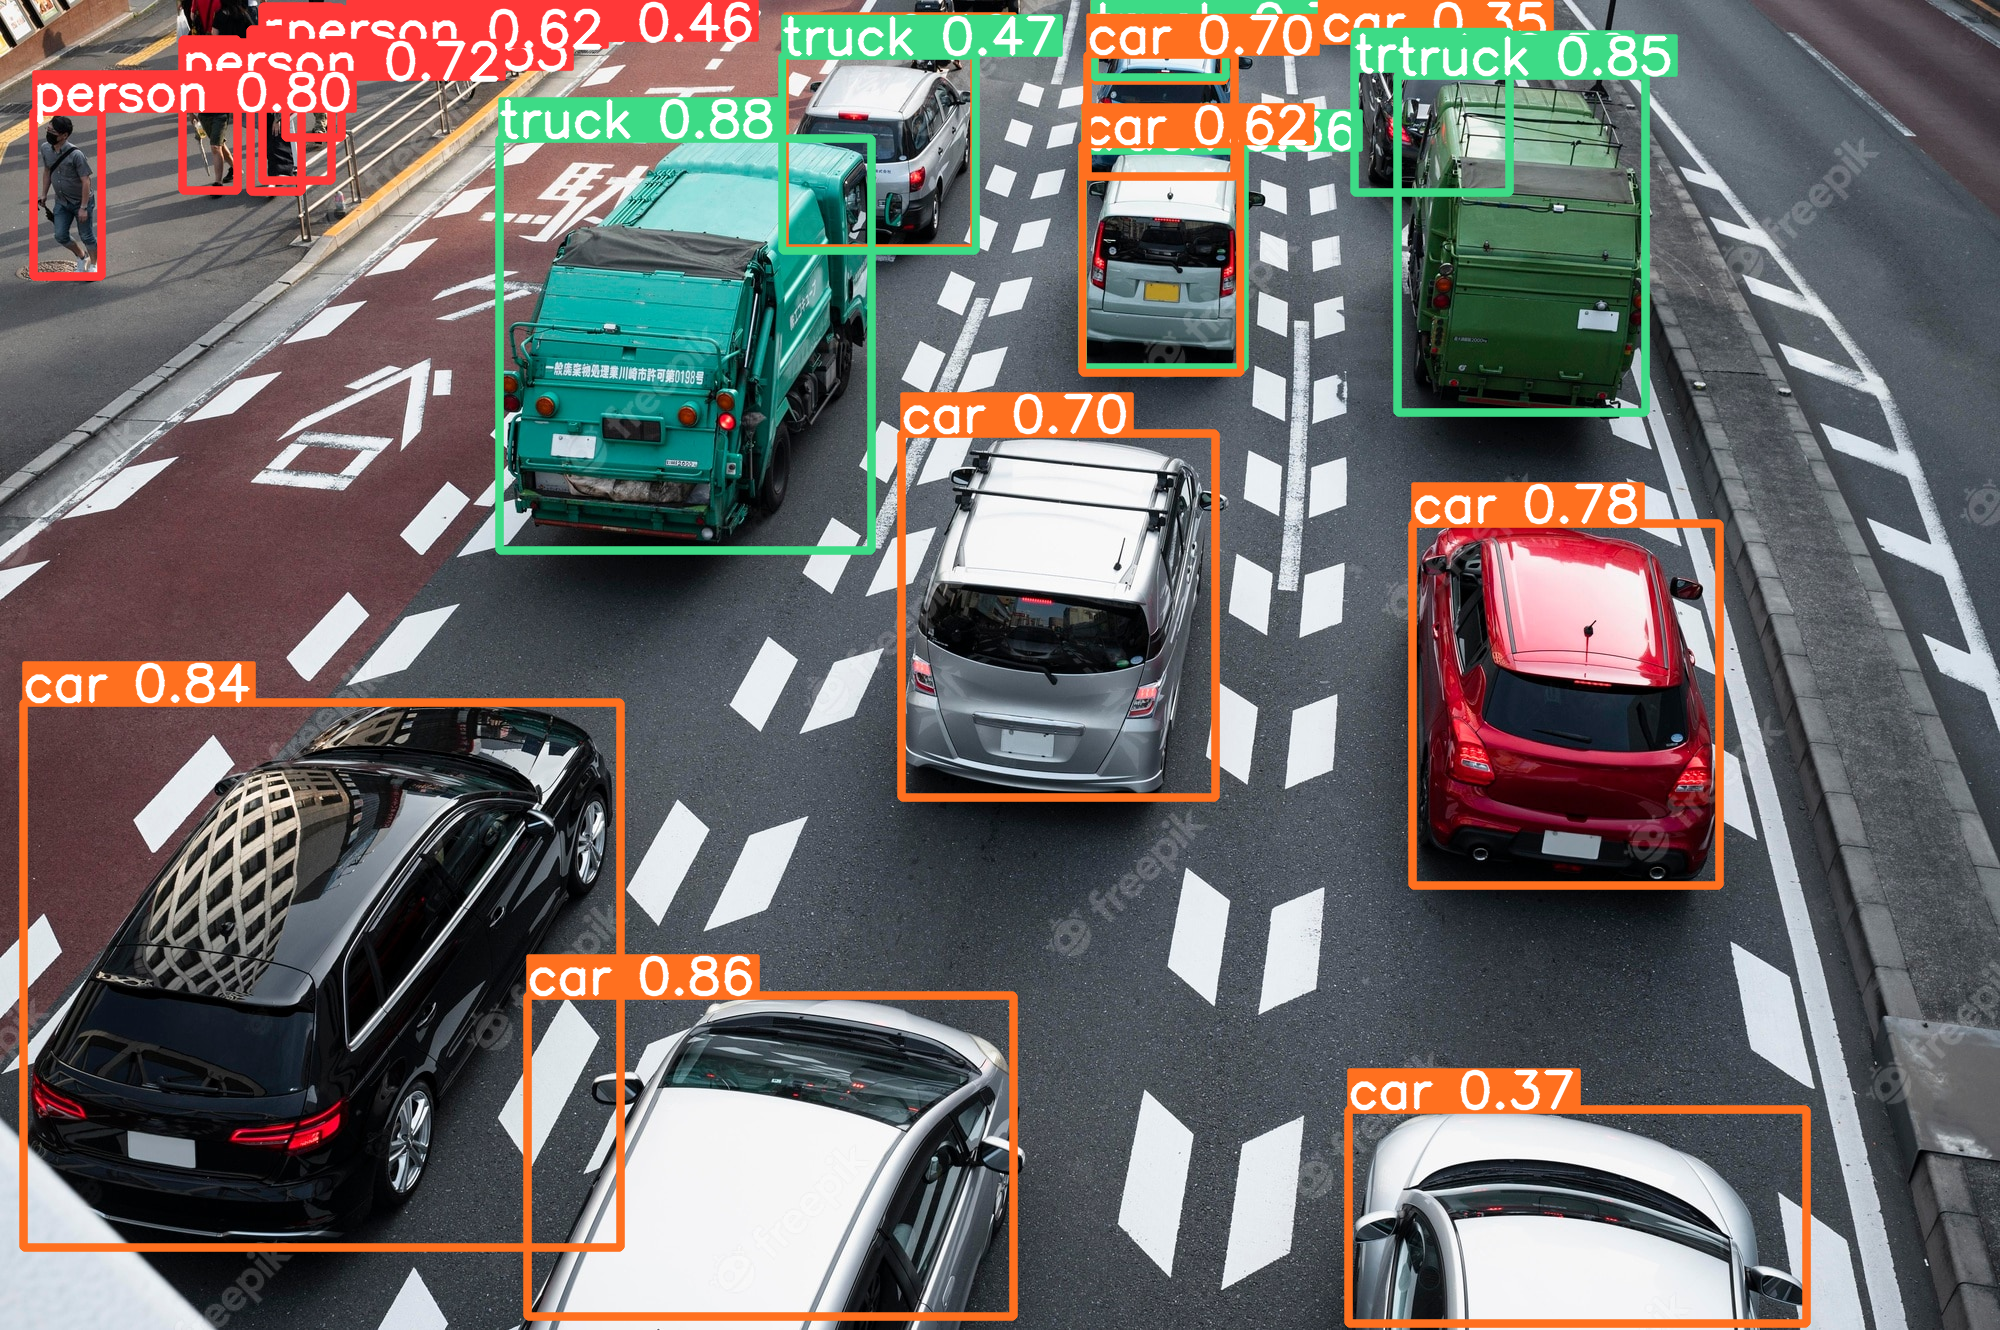

In [37]:
results.show()

### 4. Real Time Detections

In [7]:
# detect objects in real-time using the camera

cap = cv2.VideoCapture(0)

while cap.isOpened(): 
    ret, frame = cap.read()
    
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

### 5. Train from Scratch

In [2]:
import os

In [12]:
# !cd yolov5 && python train.py --img 320 --batch 16 --epochs 200 --data dataset.yml --weights yolov5s.pt

^C


### 6. Load Model

In [3]:
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ngunj/.cache\torch\hub\master.zip
YOLOv5  2023-7-1 Python-3.10.0 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data','test','images','img-43_jpg.rf.a63cf022f8ba7dbadc62c5d274547b79.jpg')

results= yolo_model(img)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 720x720 3 potholes
Speed: 11.0ms pre-process, 160.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)

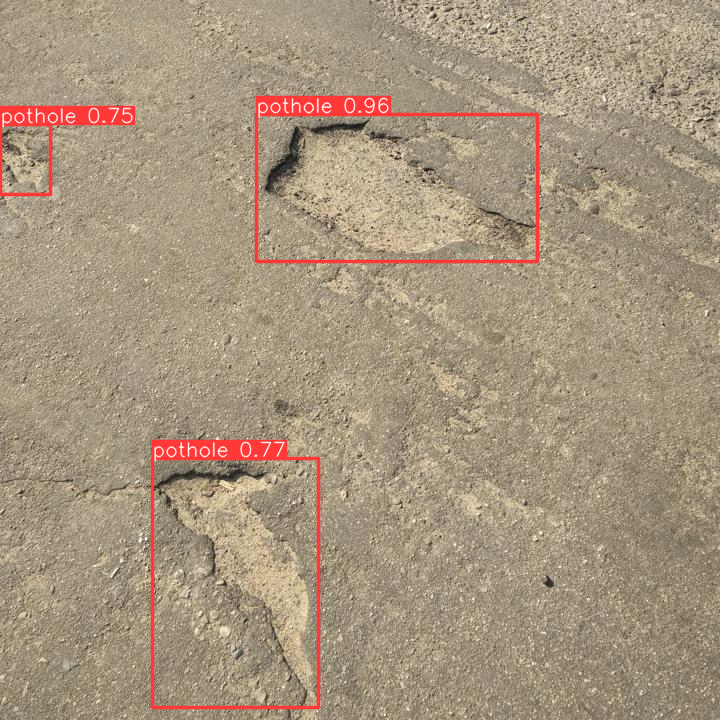

In [9]:
results.show()

#### Detecting potholes from video

In [7]:
video = os.path.join('data','pothole_video.mp4')

cap = cv2.VideoCapture(video)

while cap.isOpened(): 
    ret, frame = cap.read()
    
    results = yolo_model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break